In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

from steves_utils.ptn_do_report import (
    get_loss_curve,
)


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_3/train_k_factor")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "train_k_factor",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f["train_k_factor"] = trial["parameters"]["train_k_factor"]
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,train_k_factor
0,0.767535,0.626134,0.624896,1.136125,8.0,203.893335,2.0
1,0.793229,0.559801,0.647708,1.145146,8.0,286.987192,3.0
2,0.790972,0.568236,0.638229,1.172892,7.0,325.285373,4.0
3,0.770660,0.610240,0.622708,1.204355,12.0,173.691011,1.0
4,0.780382,0.574816,0.638437,1.123723,6.0,345.938540,5.0


In [3]:
g = all_trials.groupby("train_k_factor")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy",
]].mean()
g

,source_val_label_accuracy,target_val_label_accuracy
train_k_factor,,
1.0,0.770660,0.622708
2.0,0.767535,0.624896
3.0,0.793229,0.647708
4.0,0.790972,0.638229
5.0,0.780382,0.638437


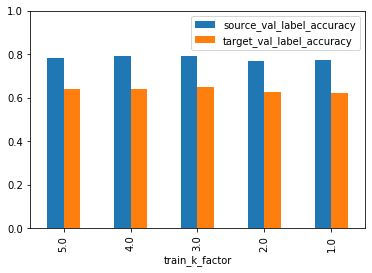

In [4]:
ax = all_trials.groupby("train_k_factor")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy"
]].mean().sort_values("train_k_factor", ascending=False).plot(kind="bar")

ax.set_ylim(0,1)
ax